<a href="https://colab.research.google.com/github/maleahjamieson/machine_learning/blob/master/HW_5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#General Concepts

###What is artificial intelligence?

Artificial intelligence is the overarching term. Essentially, it involves making computers do things that are "smart", meaning stuff that requires a person's intelligence. This usually takes input and explicit human-created rules and gets some output from it.

###What is machine learning?

Machine learning is a subcategory of artificial intelligence. It is the process of training a model to make predictions about a data set, and then use the trained model to make predictions from more data that it has not seen.

Here, computers "learn" as they are exposed to more data. This category of AI is typically less reliant on people to make changes, as the computers will learn and make certain changes themselves.

In comparison to the umbrella term AI, machine learning typically takes input and output and creates the rules on its own, which it then in turn uses to predict more outputs.

Within machine learning, we have supervised learning and unsupervised learning.

Supervised learning is essentially training a model with labeled training data, similar to what we did in Homework 3. In that homework assignment, we created our own labeled data to train our model on. There, the features were the x's (tied to each of the weights w), and the label (what we were trying to predict) was the class label (whether is was above or below the line). This is called supervised training, because you "supervise" the machine learning by feeding the system the expected output label instead of it figuring it out itself.

On the contrary, unsupervised learning is not told the labels for the data set it is trained on, and must determine the labels for the data itself. This is used for deep learning.

###What is deep learning?

Deep learning is a subcategory of machine learning. It involves multiple layers within a machine learning system, like within neural networks. These typically operate under unsupervised learning, as it does not require human interference when training with/labelling data (I discussed this above). 

#Basic Concepts

###Linear regression

In machine learning, the equation for a linear regression model looks like this:

$\hat y = b + w_1x_1 + w_2x_2 + ... + w_nx_n$

where $\hat y$ is the predicted output (a label),

$b$ is the bias,

$w_1$ is the weight of feature 1, which is $x_1$. Thus, $w_n$ is the weight of feature n, which is $x_n$.

In homework 3, we implemented linear regression both with numpy and using a Keras convolutional neural network. This can be found [in my HW3 colab notebook here.](https://colab.research.google.com/drive/1Kd_APo_rFHE6gKUk9Y0utoea6AZUn4Rk)

Linear regression is used to predict a variable that is continuous: for example, weather patterns. However, as the name implies, the relationship between the variables must be linear.

We use linear regression to approximate the best fit line, and use this to determine the output.

We determine the accuracy of linear regression typically using least squares, although this is not always the best way to do so, depending on the kind of data you are working with. For example: in the HW3 notebook above, I used binary cross entropy to determine loss, as the data I was working with was binary. I go over these loss functions in the loss section.



###Logistic regression

Logistic regression is used for binary classification problems, which is when there are only 2 possibilities for an output's class. Here, we are trying to predict values for a categorical variable. A good example of this would be whether someone had a disease or not.

A main difference between this and linear regression is that logistic regression does not require there to be a linear relationship between variables; in fact, we use this to find a curve to classify data by.

###Loss

I talked about some loss functions above. Essentially, loss is a way we determine how accurate our predictions are in a machine learning model.

When $loss = 0$ then the prediction from the model is perfect. Thus, we want low loss across all test data.

Some of the more common loss functions (at least, the ones I encountered in this class) were mean squared error loss and binary cross entropy loss.

**Mean squared error** was the average squared loss across an entire dataset. The formula for this is as follows:

$MSE = \frac1n\sum_{i=1}^{n}(y^i-\hat y^i)^2$

where $n$ is the number of points/examples,

$y^i$ is the label of the $ith$ example (associated with feature $x_i$ and weight $w_i$,

$\hat y^i$ is the model's prediction.

The binary cross entropy loss function is as follows:

$BCE = -ylog(a)-(1-y)log(1-a)$

where $y$ is the true label of the example,

a is the activation function.

In binary classification problems, there are only 2 classes. Within this function, if $y = 1$ then $loss = -log(a)$, whereas if $y = 0$ then $loss = -log(1-a)$.


###Gradients

We use gradients to iteratively train the model to minimize loss. This is a method called gradient descent.

The first step is to choose a starting value/point, and then the gradient descent algorithm calculates this gradient.

Gradients are vectors: their entries are the partial derivatives of the loss function with respect to the weights.

This looks like: $\partial{L}/\partial{w_i}$

where $L$ is the loss function and $w_i$ is the ith weight.

The gradient will always point towards the steepest increase in the loss function. Thus, the algorithm will  move in the opposite direction (the negative gradient).

It will continue to do this iteratively for all data.

###Types of gradient descent

Batch gradient descent is when we go through all of the training examples every iteration of gradient descent.

Stochastic gradient descent is when we update the parameters after each iteration of gradient descent. We also only do 1 example per iteration.

Mini-batch gradient descent, unlike batch gradient descent, goes through a "batch" of the training examples (not all of them) each iteration.

Batch gradient descent is pretty slow compared to the rest of these, especially with larger data sets. Stochastic gradient descent is middle-of-the-pack, and mini-batch gradient descent is the fastest because it does things in less iterations.



#Building a Model

###Structure and components of a convnet

There is a picture from the convolutional neural network [slides](https://github.com/schneider128k/machine_learning_course/blob/master/slides/CNN_slides.pdf) that really helped me understand the structure of a convolutional neural network. I have pasted it below:

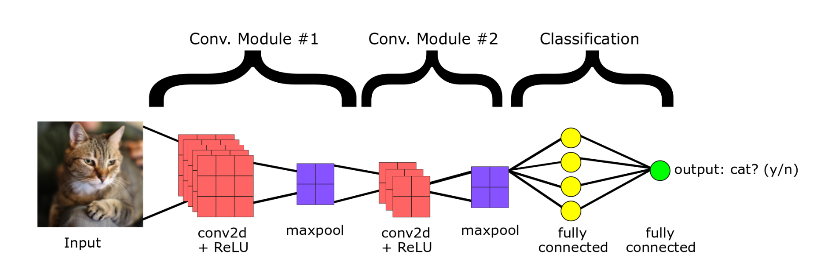

From the above example CNN, we can see that it takes as input the image of a cat. From there, it has a 2D convolution layer, followed by a maxpooling layer. It does this again in the next 2 layers, followed by 2 fully connected layers that classify the features extracted by the previous modules.

Below is an example of a CNN in Keras.
`model.summary` displays the structure of the convnet.

However, instead of doing the cat problem (above) I am going to show a simple convnet with the MNIST dataset. The main difference here is that instead of a binary classification, it will instead be categorical. This means the output will not be yes/no, but rather the category the model believes the image belongs in. In the case of the MNIST dataset, the model will output which number it thinks the image is.


In [1]:
import keras
from keras import models
from keras import layers

model = models.Sequential()

#this is conv. module 1
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

#this is conv. module 2
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

#last convolution before feeding into classifier
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#this part is the classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

As you can see from the summary, it contains the same number of convolutional modules as the image above. I separated the code with comments so you could see how I set up the different layers.

###How does convolution and maxpooling work?

In [homework 4](https://colab.research.google.com/drive/14iJSl1CJ5Gq6zKZrK-A7L27BvEv1s9LY), I created 2 functions that do convolution and maxpooling using `numpy`. I'm not going to create any code cells here, as I would just be copy-pasting my homework 4 code. So I provided the link above, and instead will describe it briefly and conceptually below.

Conceptually, convolution takes an input feature map (in my code, as a numpy array) and stacks/slides a convolutional filter over it. This filter extracts features it has been designed to "find".

My code assumes a stride of 1 for the convolutions. Stride just means how far the filter slides. This was problem 1 in homework 4.

As for maxpooling, it works similarly to convolution. We slide a window over the feature map, and take the max values from each window.

In my code, the stride is equal to the s value, which also determines the window size. This prevents overlap. This was problem 2 in homework 4.

#Compiling a Model

###Optimizers

There are actually 2 ways to set the optimizer within `model.compile()`. In the first (as below) we can set the learning rate ourselves.

The second would look like `optimizer='rmsprop'` and use the default parameters for that optimizer.

In [0]:
from keras import optimizers
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.0001), metrics=['accuracy'])

Here I am using the optimizer called RMSprop. The way this works is we divide the learning rate of a weight by an average of the gradient magnitudes for said weight.

Another optimizer we used in this class is stochastic gradient descent (`sgd`). I went over how this works in the "types of gradient descent" subsection within the previous section.

###Learning rate

The learning rate is used to predict a weight, using the existing weight and gradient. More specifically, the formula is this:

$\hat w = w - lr * gradient$

where $\hat w$ is the new weight,

$lr$ is the learning rate,

and $gradient$ is the gradient.

A small learning rate would result in the system taking too much time to learn. It would slow down gradient descent, which as I mentioned before is an iterative process.

However, too big of a learning rate causes the next point to be too far and overshoot the minimum point.

In the above code, the learning rate is found within the optimizer declaration: `optimizer=optimizers.RMSprop(lr=0.01)`

#Training a Model

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

#importing the training and test images
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#resizing the images, 4 dimensions
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

#changing labels to be categorical (since this is a categorical problem)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

#training the model
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 9s 156us/step - loss: 0.5535 - accuracy: 0.8961
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.1083 - accuracy: 0.9698
Epoch 3/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0670 - accuracy: 0.9805
Epoch 4/10
60000/60000 [==============================] - 7s 121us/step - loss: 0.0500 - accuracy: 0.9852
Epoch 5/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0379 - accuracy: 0.9889
Epoch 6/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0291 - accuracy: 0.9912
Epoch 7/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0244 - accuracy: 0.9926
Epoch 8/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0205 - accuracy: 0.9939
Epoch 9/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0169 - accuracy: 0.9948
Epoch 10/10
60000/60000 [=====================

In [4]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 70us/step


[0.050774526303243306, 0.9879999756813049]

As you can see, the accuracy and loss for the training data was pretty great!

The test accuracy and loss were also pretty good.

###Underfitting

Underfitting is the opposite of overfitting; the model is not accurate enough on the training data, and it's bad at predicting the test data. Usually, we fix this by using a different approach or different algorithms that will predict better.

###Overfitting

You can tell a model is overfitting when it does not fit new data very well, but appears to predict the training data well. In other words, when a model has low loss on the training data but high loss on the test data.

This is often caused by making a model more complex (having too many layers, doing too many things with feature extraction, etc.), or havig too small of a dataset.

We combat this by splitting our training data into training and test sets, to determine if our model overfits the data. We did this within [homework 3](https://colab.research.google.com/drive/1Kd_APo_rFHE6gKUk9Y0utoea6AZUn4Rk), when we created the data that we trained the model on.

#Finetuning a Pretrained Model

Fine-tuning involves unfreezing a few layers from a frozen model, and training the unfrozen layers along with the model. Typically, the process goes like this:

Add to the pre-trained model.

Freeze the pre-trained base (not the part you added).

Train the added parts.

Unfreeze some of the pre-trained model.

Train both of these together.

Homework 4 Problem 3 was exactly this. It was pretty long, so I won't copy/paste it here. Rather, I will link it.

[Part 1](https://colab.research.google.com/drive/1ZRx455JjTy0MX7Jqdnc0YnMiFnEbBPws)

[Part 2](https://colab.research.google.com/drive/1fhEnuNpPUcS6YWbM9K5TaF8mrphi9qk0)

Now the reason we only fine-tune some layers and not all of them is because with each layer, features get more and more specific. So fine-tuning earlier layers would affect just the more general features. This isn't as helpful as fine-tuning specific features!

###Resources

I referenced a lot of the homework assignments, linked throughout the document.

I also referenced chapter 5 of Deep Learning with Python.